<a href="https://colab.research.google.com/github/bfkons/AnexosColab/blob/main/Trabalho04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho 4: Aprendizado Supervisionado - Regressão**

## Aluno: Bruno Francisco Kons

---

## Fase 1: Análise de Correlação e Regressão Linear

Nesta fase implementaremos funções para cálculo de correlação e regressão linear simples, aplicando aos dados do arquivo datasetFase1.txt e implementando a visualização gráfica conforme determinado.


---



In [155]:
#===== IMPORTS E CONFIGURAÇÕES INICIAIS =====

# Importações necessárias
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression

# Configurações
plt.style.use('seaborn-v0_8-darkgrid')
warnings.filterwarnings('ignore')

print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


In [156]:
#===== DOWNLOAD E CARREGAMENTO DO DATASET FASE 1 =====

URL_DATASET_FASE1 = 'https://raw.githubusercontent.com/bfkons/AnexosColab/refs/heads/Trabalho04/datasetFase1.txt'

# Leitura do arquivo
resposta = requests.get(URL_DATASET_FASE1)
linhas = resposta.text.strip().split('\n')

# Processamento dos dados
datasets_fase1 = []

for linha in linhas:
    linha = linha.strip()
    if linha and '],[' in linha:
        # Remover caracteres externos
        linha = linha.lstrip('[').rstrip('];').rstrip(';')
        # Separar os dois vetores
        partes = linha.split('],[')
        valores_x = [float(v.strip()) for v in partes[0].split(';') if v.strip()]
        valores_y = [float(v.strip()) for v in partes[1].split(';') if v.strip()]
        # Criar DataFrame
        df = pd.DataFrame({'x': valores_x, 'y': valores_y})
        datasets_fase1.append(df)

# Visualização dos dados importados
print(f"Dataset carregado: {len(datasets_fase1)} conjunto(s) de dados\n")
for i, df in enumerate(datasets_fase1, 1):
    print(f"Conjunto {i}:")
    print(df)
    print()

Dataset carregado: 3 conjunto(s) de dados

Conjunto 1:
       x      y
0   10.0   8.04
1    8.0   6.95
2   13.0   7.58
3    9.0   8.81
4   11.0   8.33
5   14.0   9.96
6    6.0   7.24
7    4.0   4.26
8   12.0  10.84
9    7.0   4.82
10   5.0   5.68

Conjunto 2:
       x     y
0   10.0  9.14
1    8.0  8.14
2   13.0  8.47
3    9.0  8.77
4   11.0  9.26
5   14.0  8.10
6    6.0  6.13
7    4.0  3.10
8   12.0  9.13
9    7.0  7.26
10   5.0  4.74

Conjunto 3:
       x      y
0    8.0   6.58
1    8.0   5.76
2    8.0   7.71
3    8.0   8.84
4    8.0   8.47
5    8.0   7.04
6    8.0   5.25
7    8.0   5.56
8    8.0   7.91
9    8.0   6.89
10  19.0  12.50



## Coeficiente de Correlação de Pearson

A correlação mede a direção e intensidade da relação linear entre duas variáveis $x$ e $y$.

A equação do coeficiente de correlação de Pearson é dada por:

$$r = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2 \sum(y-\bar{y})^2}}$$

Onde $r$ é o coeficiente de correlação, $\bar{x}$ é a média dos valores de $x$ e $\bar{y}$ é a média dos valores de $y$.

O coeficiente de correlação varia no intervalo $-1 \leq r \leq 1$, sendo:
- $r = 1$ indica correlação positiva perfeita
- $r = -1$ indica correlação negativa perfeita
- $r = 0$ indica ausência de correlação linear
- $0 < r < 1$ indica correlação positiva
- $-1 < r < 0$ indica correlação negativa

In [157]:
#===== QUESTÃO 1: IMPLEMENTAÇÃO DA FUNÇÃO CORRELACAO =====

def correlacao(x, y):
    """
    Calcula o coeficiente de correlação de Pearson entre dois vetores.

    Parâmetros:
    x : array
        Vetor com valores da variável independente
    y : array
        Vetor com valores da variável dependente

    Retorna:
    r : float
        Coeficiente de correlação de Pearson
    """
    # Converter para arrays numpy
    x = np.array(x)
    y = np.array(y)

    # Calcular médias
    media_x = np.mean(x)
    media_y = np.mean(y)

    # Calcular desvios em relação à média
    desvio_x = x - media_x
    desvio_y = y - media_y

    # Calcular numerador: soma dos produtos dos desvios
    numerador = np.sum(desvio_x * desvio_y)

    # Calcular denominador: raiz do produto das somas dos quadrados dos desvios
    denominador = np.sqrt(np.sum(desvio_x**2) * np.sum(desvio_y**2))

    # Calcular coeficiente de correlação
    r = numerador / denominador

    return r

# Determinação de todos os coeficientes de correlação de todos os conjuntos do dataset
print("Coeficientes de correlação:")
for i, dataset in enumerate(datasets_fase1, 1):
    r = correlacao(dataset['x'], dataset['y'])
    print(f"Conjunto {i}: r = {r:.4f}")

Coeficientes de correlação:
Conjunto 1: r = 0.8164
Conjunto 2: r = 0.8061
Conjunto 3: r = 0.8165


## Regressão Linear Simples

A regressão linear simples busca estabelecer uma relação linear entre uma variável independente $x$ e uma variável dependente $y$, permitindo fazer previsões.

A reta de regressão é definida por:

$$\hat{y} = \beta_0 + \beta_1 x$$

Onde $\hat{y}$ é o valor predito de $y$, $\beta_0$ é o coeficiente linear (intercepto) e $\beta_1$ é o coeficiente angular (inclinação).

Os coeficientes são calculados pelas seguintes equações:

$$\beta_1 = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

Interpretação geométrica: $\beta_1$ representa a taxa de variação de $y$ em relação a $x$, e $\beta_0$ representa o valor de $y$ quando $x = 0$.

In [158]:
#===== QUESTÃO 1: IMPLEMENTAÇÃO DA FUNÇÃO REGRESSAO =====

def regressao(x, y):
    """
    Calcula os coeficientes da regressão linear simples.

    Parâmetros:
    x : array
        Vetor com valores da variável independente
    y : array
        Vetor com valores da variável dependente

    Retorna:
    beta0 : float
        Coeficiente linear (intercepto)
    beta1 : float
        Coeficiente angular (inclinação)
    """
    # Converter para arrays numpy
    x = np.array(x)
    y = np.array(y)

    # Calcular médias
    media_x = np.mean(x)
    media_y = np.mean(y)

    # Calcular desvios em relação à média
    desvio_x = x - media_x
    desvio_y = y - media_y

    # Calcular beta1: coeficiente angular
    beta1 = np.sum(desvio_x * desvio_y) / np.sum(desvio_x**2)

    # Calcular beta0: coeficiente linear
    beta0 = media_y - beta1 * media_x

    return beta0, beta1

# Determinação de todos os coeficientes beta0 e beta1 de todos os conjuntos do dataset
print("Coeficientes de regressão linear:")
for i, dataset in enumerate(datasets_fase1, 1):
    beta0, beta1 = regressao(dataset['x'], dataset['y'])
    print(f"Conjunto {i}: beta0 = {beta0:.4f}, beta1 = {beta1:.4f}")
    print(f"Equação da reta de regressão: y = {beta0:.4f} + {beta1:.4f}x\n")

Coeficientes de regressão linear:
Conjunto 1: beta0 = 3.0001, beta1 = 0.5001
Equação da reta de regressão: y = 3.0001 + 0.5001x

Conjunto 2: beta0 = 3.0647, beta1 = 0.4902
Equação da reta de regressão: y = 3.0647 + 0.4902x

Conjunto 3: beta0 = 3.0017, beta1 = 0.4999
Equação da reta de regressão: y = 3.0017 + 0.4999x



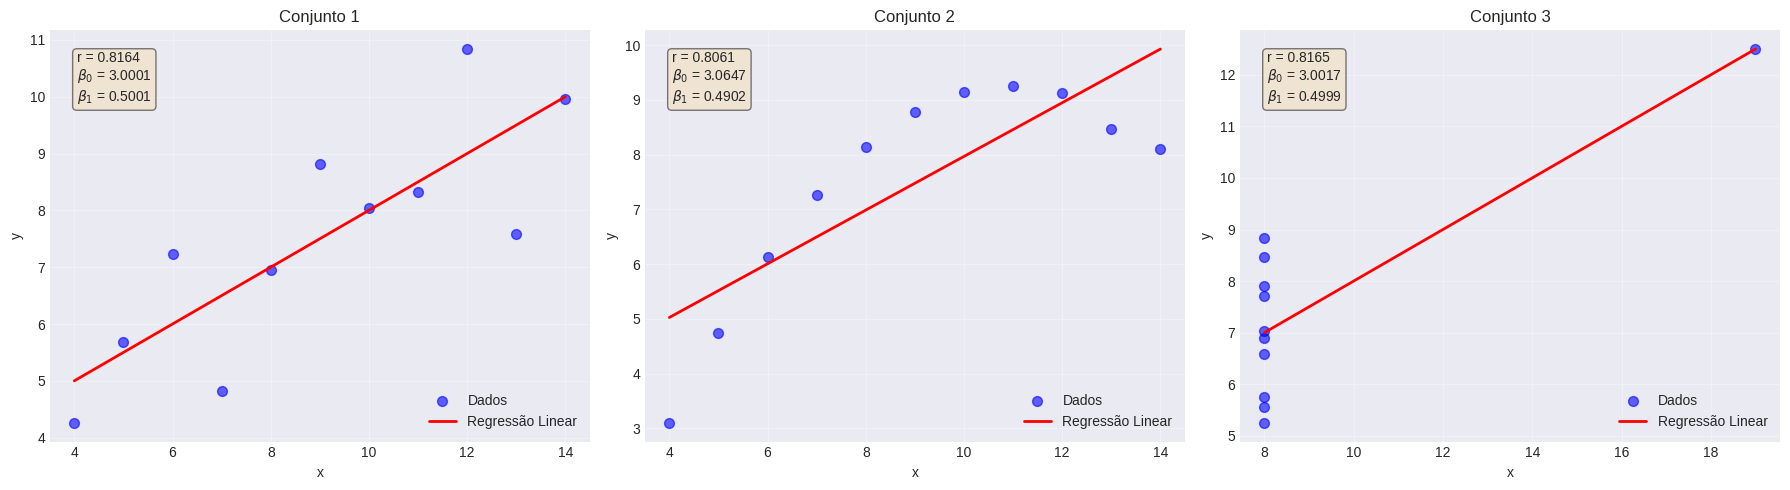

In [159]:
#===== QUESTÃO 2: VISUALIZAÇÃO GRÁFICA =====

# Criar figura com subplots para cada conjunto de dados
fig, axes = plt.subplots(1, len(datasets_fase1), figsize=(6*len(datasets_fase1), 5))

# Processar cada conjunto de dados
for i, dataset in enumerate(datasets_fase1):
    # Extrair dados
    x = dataset['x'].values
    y = dataset['y'].values

    # Calcular correlação e regressão
    r = correlacao(x, y)
    beta0, beta1 = regressao(x, y)

    # Gerar pontos para a linha de regressão
    x_linha = np.linspace(x.min(), x.max(), 100)
    y_linha = beta0 + beta1 * x_linha

    # Plotar scatter plot
    axes[i].scatter(x, y, color='blue', alpha=0.6, s=50, label='Dados')

    # Plotar linha de regressão
    axes[i].plot(x_linha, y_linha, color='red', linewidth=2, label='Regressão Linear')

    # Configurações do gráfico
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Conjunto {i+1}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

    # Adicionar texto com os coeficientes
    texto = f'r = {r:.4f}\n$\\beta_0$ = {beta0:.4f}\n$\\beta_1$ = {beta1:.4f}'
    axes[i].text(0.05, 0.95, texto, transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [160]:
#===== QUESTÃO 3: ANÁLISE DOS RESULTADOS E ADEQUAÇÃO À REGRESSÃO LINEAR =====

print("Análise de adequação à regressão linear:")
print("="*60)

for i, dataset in enumerate(datasets_fase1, 1):
    x = dataset['x'].values
    y = dataset['y'].values

    r = correlacao(x, y)
    beta0, beta1 = regressao(x, y)
    r_quadrado = r**2

    # Calcular valores preditos
    y_predito = beta0 + beta1 * x

    # Calcular resíduos
    residuos = y - y_predito

    # Calcular EQM
    eqm = np.sum(residuos**2) / len(x)

    print(f"\nConjunto {i}:")
    print(f"  Correlação (r): {r:.4f}")
    print(f"  R²: {r_quadrado:.4f}")
    print(f"  Erro Quadrático Médio: {eqm:.4f}")

Análise de adequação à regressão linear:

Conjunto 1:
  Correlação (r): 0.8164
  R²: 0.6665
  Erro Quadrático Médio: 1.2512

Conjunto 2:
  Correlação (r): 0.8061
  R²: 0.6498
  Erro Quadrático Médio: 1.2948

Conjunto 3:
  Correlação (r): 0.8165
  R²: 0.6667
  Erro Quadrático Médio: 1.2493


## Análise de Adequação à Regressão Linear

Os três conjuntos apresentam métricas estatísticas praticamente idênticas:

- Correlação $r \approx 0.81$
- Coeficiente de determinação $R^2 \approx 0.66$
- Erro Quadrático Médio $EQM \approx 1.25$

Apesar dos valores numéricos similares, a análise visual dos gráficos revela diferenças fundamentais:

- Conjunto 1: Apropriado para regressão linear. Os pontos apresentam dispersão uniforme ao redor da reta de regressão.
- Conjunto 2: Inadequado para regressão linear. Os pontos seguem um padrão curvilíneo (parabólico), indicando relação não-linear.
- Conjunto 3: Inadequado para regressão linear. Os dados formam agrupamentos distintos, violando a premissa de distribuição contínua.

O exemplo ilustra que métricas estatísticas isoladas nem sempre são insuficientes para validar a adequação de um modelo de regressão linear. A visualização gráfica dos dados é essencial antes da aplicação do modelo.


---



## **Fase 2: Regressão Linear Múltipla**

A regressão linear múltipla, permite modelar a relação entre uma variável dependente e múltiplas variáveis independentes.

Objetivo: prever o preço de casas com base em duas características: tamanho da casa (em metros quadrados) e número de quartos.

A regressão linear múltipla é definida por:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

Para $m$ observações e $n$ variáveis independentes, o modelo pode ser escrito na forma matricial como:

$$\hat{y} = X\beta$$

Onde a matriz $X$ é definida como:

$$X = \begin{bmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1n} \\ 1 & x_{21} & x_{22} & \cdots & x_{2n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{m1} & x_{m2} & \cdots & x_{mn} \end{bmatrix}$$

A primeira coluna de uns corresponde ao termo constante $\beta_0$.

Os coeficientes que minimizam o erro quadrático são obtidos pela equação:

$$\beta = (X^T X)^{-1} X^T y$$

Onde $X^T$ é a transposta da matriz $X$, $(X^T X)^{-1}$ é a inversa da matriz $X^T X$ e $y$ é o vetor de valores observados da variável dependente.

In [161]:
#===== ITEM A: DOWNLOAD E CARREGAMENTO DO DATASET FASE 2 =====

# URL para donwload do dataset Fase 2
URL_DATASET_FASE2 = 'https://raw.githubusercontent.com/bfkons/AnexosColab/refs/heads/Trabalho04/data.csv'

# Carregamento do dataset
dados_fase2 = pd.read_csv(URL_DATASET_FASE2, header=None, names=['tamanho', 'quartos', 'preco'])

# Visualização do dataset
print("Resposta item a): Dataset carregado com sucesso")
print(f"Dimensões: {dados_fase2.shape[0]} linhas e {dados_fase2.shape[1]} colunas")
print(f"Colunas: {list(dados_fase2.columns)}")
print("\nDataset completo:")
print(dados_fase2.to_string())

Resposta item a): Dataset carregado com sucesso
Dimensões: 47 linhas e 3 colunas
Colunas: ['tamanho', 'quartos', 'preco']

Dataset completo:
    tamanho  quartos     preco
0      2104        3  399900.0
1      1600        3  329900.0
2      2400        3  369000.0
3      1416        2  232000.0
4      3000        4  539900.0
5      1985        4  299900.0
6      1534        3  314900.0
7      1427        3  199000.0
8      1380        3  212000.0
9      1494        3  242500.0
10     1940        4  240000.0
11     2000        3  347000.0
12     1890        3  330000.0
13     4478        5  699900.0
14     1268        3  259900.0
15     2300        4  449900.0
16     1320        2  299900.0
17     1236        3  199900.0
18     2609        4  500000.0
19     3031        4  599000.0
20     1767        3  252900.0
21     1888        2  255000.0
22     1604        3  242900.0
23     1962        4  259900.0
24     3890        3  573900.0
25     1100        3  249900.0
26     1458        3  

In [162]:
#===== ITEM B: ANÁLISE EXPLORATÓRIA DOS DADOS =====

print("Resposta item b):")
print("="*60)

# Estatísticas de preço
print("\nEstatísticas de Preço:")
print(f"Preço médio das casas: R$ {dados_fase2['preco'].mean():.2f}")
print(f"Preço mínimo: R$ {dados_fase2['preco'].min():.2f}")
print(f"Preço máximo: R$ {dados_fase2['preco'].max():.2f}")

# Casa mais barata
idx_mais_barata = dados_fase2['preco'].idxmin()
print(f"\nCasa mais barata:")
print(f"  Tamanho: {dados_fase2.loc[idx_mais_barata, 'tamanho']:.0f} pés²")
print(f"  Quartos: {dados_fase2.loc[idx_mais_barata, 'quartos']:.0f}")
print(f"  Preço: R$ {dados_fase2.loc[idx_mais_barata, 'preco']:.2f}")

# Casa mais cara
idx_mais_cara = dados_fase2['preco'].idxmax()
print(f"\nCasa mais cara:")
print(f"  Tamanho: {dados_fase2.loc[idx_mais_cara, 'tamanho']:.0f} pés²")
print(f"  Quartos: {dados_fase2.loc[idx_mais_cara, 'quartos']:.0f}")
print(f"  Preço: R$ {dados_fase2.loc[idx_mais_cara, 'preco']:.2f}")

# Distribuição de quartos
print(f"\nDistribuição de quartos:")
distribuicao_quartos = dados_fase2['quartos'].value_counts().sort_index()
for quartos, quantidade in distribuicao_quartos.items():
    print(f"  {int(quartos)} quartos: {quantidade} casas")

Resposta item b):

Estatísticas de Preço:
Preço médio das casas: R$ 340412.77
Preço mínimo: R$ 169900.00
Preço máximo: R$ 699900.00

Casa mais barata:
  Tamanho: 1000 pés²
  Quartos: 1
  Preço: R$ 169900.00

Casa mais cara:
  Tamanho: 4478 pés²
  Quartos: 5
  Preço: R$ 699900.00

Distribuição de quartos:
  1 quartos: 1 casas
  2 quartos: 6 casas
  3 quartos: 25 casas
  4 quartos: 14 casas
  5 quartos: 1 casas


In [163]:
#===== ITEM C: CONSTRUÇÃO DA MATRIZ X E VETOR Y =====

# Extrair dados
tamanho = dados_fase2['tamanho'].values
quartos = dados_fase2['quartos'].values
preco = dados_fase2['preco'].values

# Construir matriz X: [1, tamanho, quartos]
# A primeira coluna de 1's corresponde ao intercepto beta0
X = np.column_stack([np.ones(len(tamanho)), tamanho, quartos])

# Construir vetor y
y = preco

print("Resposta item c):")
print("="*60)
print(f"\nMatriz X [1, tamanho, quartos] construída com dimensões: {X.shape}")
print("Matriz X:")
print(X[:])
print(f"\nVetor y [preço] construído com dimensões: {y.shape}")
print("Vetor Y:")
print(y[:])

Resposta item c):

Matriz X [1, tamanho, quartos] construída com dimensões: (47, 3)
Matriz X:
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]
 [1.000e+00 1.940e+03 4.000e+00]
 [1.000e+00 2.000e+03 3.000e+00]
 [1.000e+00 1.890e+03 3.000e+00]
 [1.000e+00 4.478e+03 5.000e+00]
 [1.000e+00 1.268e+03 3.000e+00]
 [1.000e+00 2.300e+03 4.000e+00]
 [1.000e+00 1.320e+03 2.000e+00]
 [1.000e+00 1.236e+03 3.000e+00]
 [1.000e+00 2.609e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 1.767e+03 3.000e+00]
 [1.000e+00 1.888e+03 2.000e+00]
 [1.000e+00 1.604e+03 3.000e+00]
 [1.000e+00 1.962e+03 4.000e+00]
 [1.000e+00 3.890e+03 3.000e+00]
 [1.000e+00 1.100e+03 3.000e+00]
 [1.000e+00 1.458e+03 3.000e+00]
 [1.000e+00 2.5

Resposta item d):

Tamanho vs Preço:
  Correlação: r = 0.8550
  Regressão: y = 71270.57 + 134.5253x

Número de quartos vs Preço:
  Correlação: r = 0.4423
  Regressão: y = 110034.27 + 72669.7284x



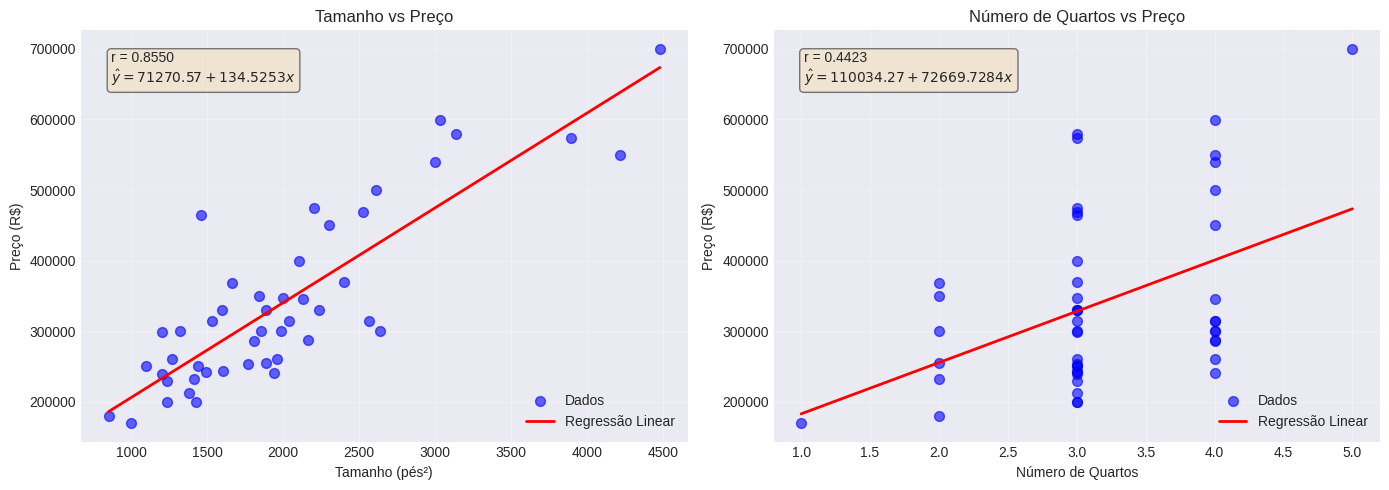

In [164]:
#===== ITEM D: CORRELAÇÕES E GRÁFICOS DE DISPERSÃO 2D =====

# Calcular correlação: Tamanho vs Preço
correlacao_tamanho_preco = correlacao(dados_fase2['tamanho'], dados_fase2['preco'])

# Calcular correlação: Número de quartos vs Preço
correlacao_quartos_preco = correlacao(dados_fase2['quartos'], dados_fase2['preco'])

# Calcular regressões simples
beta0_tamanho, beta1_tamanho = regressao(dados_fase2['tamanho'], dados_fase2['preco'])
beta0_quartos, beta1_quartos = regressao(dados_fase2['quartos'], dados_fase2['preco'])

print("Resposta item d):")
print("="*60)
print(f"\nTamanho vs Preço:")
print(f"  Correlação: r = {correlacao_tamanho_preco:.4f}")
print(f"  Regressão: y = {beta0_tamanho:.2f} + {beta1_tamanho:.4f}x")
print(f"\nNúmero de quartos vs Preço:")
print(f"  Correlação: r = {correlacao_quartos_preco:.4f}")
print(f"  Regressão: y = {beta0_quartos:.2f} + {beta1_quartos:.4f}x\n")

# Criar gráficos de dispersão
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tamanho vs Preço
tamanho_linha = np.linspace(dados_fase2['tamanho'].min(), dados_fase2['tamanho'].max(), 100)
preco_linha_tamanho = beta0_tamanho + beta1_tamanho * tamanho_linha

axes[0].scatter(dados_fase2['tamanho'], dados_fase2['preco'], color='blue', alpha=0.6, s=50, label='Dados')
axes[0].plot(tamanho_linha, preco_linha_tamanho, color='red', linewidth=2, label='Regressão Linear')
axes[0].set_xlabel('Tamanho (pés²)')
axes[0].set_ylabel('Preço (R$)')
axes[0].set_title('Tamanho vs Preço')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

texto1 = f'r = {correlacao_tamanho_preco:.4f}\n$\\hat{{y}} = {beta0_tamanho:.2f} + {beta1_tamanho:.4f}x$'
axes[0].text(0.05, 0.95, texto1, transform=axes[0].transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Gráfico 2: Quartos vs Preço
quartos_linha = np.linspace(dados_fase2['quartos'].min(), dados_fase2['quartos'].max(), 100)
preco_linha_quartos = beta0_quartos + beta1_quartos * quartos_linha

axes[1].scatter(dados_fase2['quartos'], dados_fase2['preco'], color='blue', alpha=0.6, s=50, label='Dados')
axes[1].plot(quartos_linha, preco_linha_quartos, color='red', linewidth=2, label='Regressão Linear')
axes[1].set_xlabel('Número de Quartos')
axes[1].set_ylabel('Preço (R$)')
axes[1].set_title('Número de Quartos vs Preço')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

texto2 = f'r = {correlacao_quartos_preco:.4f}\n$\\hat{{y}} = {beta0_quartos:.2f} + {beta1_quartos:.4f}x$'
axes[1].text(0.05, 0.95, texto2, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [165]:
#===== IMPLEMENTAÇÃO DA FUNÇÃO REGMULTIPLA =====

def regmultipla(X, y):
    """
    Calcula os coeficientes da regressão linear múltipla.

    Parâmetros:
    X : array
        Matriz de features (m x n), onde m é o número de amostras
        e n é o número de variáveis independentes (incluindo coluna de 1's)
    y : array
        Vetor de valores da variável dependente (m x 1)

    Retorna:
    beta : array
        Vetor de coeficientes (n x 1)
    """
    # Converter para arrays numpy
    X = np.array(X)
    y = np.array(y)

    # Calcular X^T (transposta de X)
    X_transposta = X.T

    # Calcular X^T X
    XTX = X_transposta @ X

    # Calcular (X^T X)^-1
    XTX_inversa = np.linalg.inv(XTX)

    # Calcular X^T y
    XTy = X_transposta @ y

    # Calcular beta = (X^T X)^-1 X^T y
    beta = XTX_inversa @ XTy

    return beta

print("Função regmultipla implementada com sucesso")

Função regmultipla implementada com sucesso


In [166]:
#===== APLICAÇÃO DA FUNÇÃO REGMULTIPLA =====

# Aplicar regressão linear múltipla
beta = regmultipla(X, y)

print("Coeficientes da regressão linear múltipla:")
print("="*60)
print(f"beta0 (intercepto): {beta[0]:.4f}")
print(f"beta1 (tamanho): {beta[1]:.4f}")
print(f"beta2 (quartos): {beta[2]:.4f}")

# Exibir equação de regressão múltipla
print("\nEquação de regressão múltipla:")
sinal_beta1 = '+' if beta[1] >= 0 else '-'
sinal_beta2 = '+' if beta[2] >= 0 else '-'
print(f"y = {beta[0]:.4f} {sinal_beta1} {abs(beta[1]):.4f}*x1 {sinal_beta2} {abs(beta[2]):.4f}*x2")
print(f"Preço = {beta[0]:.4f} {sinal_beta1} {abs(beta[1]):.4f} × Tamanho {sinal_beta2} {abs(beta[2]):.4f} × Quartos")

print("\nInterpretação:")
print(f"  - Cada pé² adicional no tamanho altera o preço em R$ {beta[1]:.2f}")
if beta[2] > 0:
    print(f"  - Cada quarto adicional aumenta o preço em R$ {beta[2]:.2f}")
else:
    print(f"  - Cada quarto adicional diminui o preço em R$ {abs(beta[2]):.2f}")

Coeficientes da regressão linear múltipla:
beta0 (intercepto): 89597.7660
beta1 (tamanho): 139.2106
beta2 (quartos): -8737.9154

Equação de regressão múltipla:
y = 89597.7660 + 139.2106*x1 - 8737.9154*x2
Preço = 89597.7660 + 139.2106 × Tamanho - 8737.9154 × Quartos

Interpretação:
  - Cada pé² adicional no tamanho altera o preço em R$ 139.21
  - Cada quarto adicional diminui o preço em R$ 8737.92


In [180]:
#===== ITENS E, F e G: GRÁFICO 3D COM PLANO DE REGRESSÃO E CORRELAÇÕES =====

import plotly.graph_objects as go

print("Resposta itens e), f) e g):")

# Criar figura interativa 3D
fig = go.Figure()

# Adicionar pontos de dados (scatter 3D)
fig.add_trace(go.Scatter3d(
    x=dados_fase2['tamanho'],
    y=dados_fase2['quartos'],
    z=dados_fase2['preco'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.6
    ),
    name='Dados'
))

# Criar grade para o plano de regressão
tamanho_range = np.linspace(dados_fase2['tamanho'].min(), dados_fase2['tamanho'].max(), 20)
quartos_range = np.arange(1, 6)
tamanho_grid, quartos_grid = np.meshgrid(tamanho_range, quartos_range)

# Criar matriz X para o grid (generalizado)
X_grid = np.column_stack([
    np.ones(tamanho_grid.flatten().shape),
    tamanho_grid.flatten(),
    quartos_grid.flatten()
])

# Calcular preços preditos usando produto matricial
preco_grid_flat = X_grid @ beta

# Reshape para formato do grid
preco_grid = preco_grid_flat.reshape(tamanho_grid.shape)

# Adicionar plano de regressão (superfície)
fig.add_trace(go.Surface(
    x=tamanho_grid,
    y=quartos_grid,
    z=preco_grid,
    colorscale='Reds',
    opacity=0.5,
    name='Plano de Regressão',
    showscale=False
))

# Adicionar anotação com coeficientes de correlação
anotacao = f"Correlações:<br>Tamanho vs Preço: r = {correlacao_tamanho_preco:.4f}<br>Quartos vs Preço: r = {correlacao_quartos_preco:.4f}"

# Configurar layout
fig.update_layout(
    title='Regressão Linear Múltipla: Preço de Casas',
    scene=dict(
        xaxis_title='Tamanho (pés²)',
        yaxis_title='Número de Quartos',
        zaxis_title='Preço (R$)',
        yaxis=dict(
            tickmode='linear',
            tick0=1,
            dtick=1
        ),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.3)
        )
    ),
    width=1400,
    height=1200,
    showlegend=True,
    annotations=[
        dict(
            text=anotacao,
            xref="paper", yref="paper",
            x=0.02, y=0.98,
            showarrow=False,
            bgcolor="wheat",
            opacity=0.8,
            font=dict(size=12),
            align="left"
        )
    ]
)

# Mostrar gráfico
fig.show()

print("Gráfico 3D com plano de regressão e coeficientes de correlação gerado com sucesso")

Resposta itens e), f) e g):


Gráfico 3D com plano de regressão e coeficientes de correlação gerado com sucesso


In [182]:
#===== ITEM H: PREDIÇÃO DE PREÇO PARA CASA COM 1650 PÉS² E 3 QUARTOS =====

# Dados da casa para predição
tamanho_teste = 1650
quartos_teste = 3

# Calcular preço predito usando o modelo de regressão múltipla
preco_predito = beta[0] + beta[1] * tamanho_teste + beta[2] * quartos_teste

print("Resposta item h):")
print("="*60)
print(f"\nCaracterísticas da casa:")
print(f"  Tamanho: {tamanho_teste} pés²")
print(f"  Quartos: {quartos_teste}")
print(f"\nPreço predito: R$ {preco_predito:.2f}")
print(f"\nVerificação: O resultado esperado é de R$ 293.081,00")
print(f"Diferença em relação ao esperado: R$ {abs(preco_predito - 293081):.2f}")

Resposta item h):

Características da casa:
  Tamanho: 1650 pés²
  Quartos: 3

Preço predito: R$ 293081.57

Verificação: O resultado esperado é de R$ 293.081,00
Diferença em relação ao esperado: R$ 0.57


In [183]:
#===== ITEM I: COMPARAÇÃO COM NUMPY E SCIKIT-LEARN =====

print("Resposta item i):")
print("="*60)

# Resultados da implementação realizada (regmultipla)
print("\n1. Implementação realizada (regmultipla):")
print(f"   beta0 = {beta[0]:.4f}")
print(f"   beta1 = {beta[1]:.4f}")
print(f"   beta2 = {beta[2]:.4f}")

# Usando numpy (lstsq)
X_numpy = np.column_stack([np.ones(len(tamanho)), tamanho, quartos])
beta_numpy, residuals, rank, s = np.linalg.lstsq(X_numpy, y, rcond=None)
print("\n2. NumPy (np.linalg.lstsq):")
print(f"   beta0 = {beta_numpy[0]:.4f}")
print(f"   beta1 = {beta_numpy[1]:.4f}")
print(f"   beta2 = {beta_numpy[2]:.4f}")

# Usando scikit-learn
X_sklearn = np.column_stack([tamanho, quartos])
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_sklearn, y)
print("\n3. Scikit-learn (LinearRegression):")
print(f"   beta0 = {modelo_sklearn.intercept_:.4f}")
print(f"   beta1 = {modelo_sklearn.coef_[0]:.4f}")
print(f"   beta2 = {modelo_sklearn.coef_[1]:.4f}")

# Verificar consistência estabelecendo padrão de referência
print("\n" + "="*60)
print("Verificação de consistência:")

# Primeiro: verificar se NumPy e Sklearn concordam (estabelecer padrão correto)
beta_sklearn = np.array([modelo_sklearn.intercept_, modelo_sklearn.coef_[0], modelo_sklearn.coef_[1]])

if np.allclose(beta_numpy, beta_sklearn):
    print("  NumPy e Scikit-learn concordam entre si (padrão de referência estabelecido)")

    # Agora verificar se implementação realizada está correta
    if np.allclose(beta, beta_numpy):
        print("  Implementação realizada VALIDADA: resultados idênticos ao padrão")
        print("\nConclusão: A implementação da função regmultipla está correta.")
    else:
        print("  ERRO: Implementação realizada difere do padrão estabelecido")
        print("  Diferenças:")
        print(f"    beta0: {abs(beta[0] - beta_numpy[0]):.10f}")
        print(f"    beta1: {abs(beta[1] - beta_numpy[1]):.10f}")
        print(f"    beta2: {abs(beta[2] - beta_numpy[2]):.10f}")
        print("\nConclusão: Revisar a implementação da função regmultipla.")
else:
    print("  PROBLEMA: NumPy e Scikit-learn não concordam entre si")
    print("  Isso indica um problema na entrada de dados ou nas bibliotecas.")

Resposta item i):

1. Implementação realizada (regmultipla):
   beta0 = 89597.7660
   beta1 = 139.2106
   beta2 = -8737.9154

2. NumPy (np.linalg.lstsq):
   beta0 = 89597.7660
   beta1 = 139.2106
   beta2 = -8737.9154

3. Scikit-learn (LinearRegression):
   beta0 = 89597.7660
   beta1 = 139.2106
   beta2 = -8737.9154

Verificação de consistência:
  NumPy e Scikit-learn concordam entre si (padrão de referência estabelecido)
  Implementação realizada VALIDADA: resultados idênticos ao padrão

Conclusão: A implementação da função regmultipla está correta.


## **Fase 3: Regressão Polinomial - Overfitting**

Nesta fase iremos considerar a Regressão Polinomial com uma variável $x$. A Regressão Polinomial encaixa uma relação não linear entre o valor de $x$ e o valor correspondente de $y$. Neste caso a fórmula geral da Regressão Polinomial é:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_N x^N$$

Para calcular o valor de $\beta$ podemos usar a função polyfit do NumPy. Será verificaod o que ocorre quando aumentamos o grau de um polinômio, ou seja, quando consideramos $N = 1, 2, 3$, etc.

In [185]:
#===== ITEM A: DOWNLOAD E CARREGAMENTO DO DATASET FASE 3 =====

# URL do dataset Fase 3
URL_DATASET_FASE3 = 'https://raw.githubusercontent.com/bfkons/AnexosColab/refs/heads/Trabalho04/data_preg.csv'

# Carregamento do dataset
dados_fase3 = pd.read_csv(URL_DATASET_FASE3, header=None, names=['x', 'y'])

print("Resposta item a): Dataset carregado com sucesso")
print(f"Dimensões: {dados_fase3.shape[0]} linhas e {dados_fase3.shape[1]} colunas")
print(f"Colunas: {list(dados_fase3.columns)}")
print("\nDataset completo:")
print(dados_fase3.to_string())

Resposta item a): Dataset carregado com sucesso
Dimensões: 53 linhas e 2 colunas
Colunas: ['x', 'y']

Dataset completo:
      x         y
0   0.0  0.258060
1   0.1  0.508550
2   0.2  0.793570
3   0.3  0.557730
4   0.4  0.992260
5   0.5  1.190600
6   0.6  0.786390
7   0.7  0.761640
8   0.8  1.014000
9   0.9  1.102100
10  1.0  1.265600
11  1.1  1.399100
12  1.2  1.017600
13  1.3  1.226000
14  1.4  1.786500
15  1.5  1.026700
16  1.6  1.928400
17  1.7  1.722000
18  1.8  1.462500
19  1.9  1.524800
20  2.0  1.146600
21  2.1  1.322100
22  2.2  1.771600
23  2.3  1.292500
24  2.4  1.196600
25  2.5  0.830070
26  2.6  1.004400
27  2.7  1.051400
28  2.8  1.014100
29  2.9  0.634760
30  3.0  0.508560
31  3.1  1.029600
32  3.2 -0.020635
33  3.3  0.727420
34  3.4  0.657750
35  3.5  0.445400
36  3.6 -0.343810
37  3.7 -0.267960
38  3.8 -0.276500
39  3.9 -0.008038
40  4.0 -0.620250
41  4.1 -0.097050
42  4.2 -0.764810
43  4.3 -0.262410
44  4.4 -0.457430
45  4.5 -0.198480
46  4.6 -0.278650
47  4.7 -0.09620

Resposta item b):


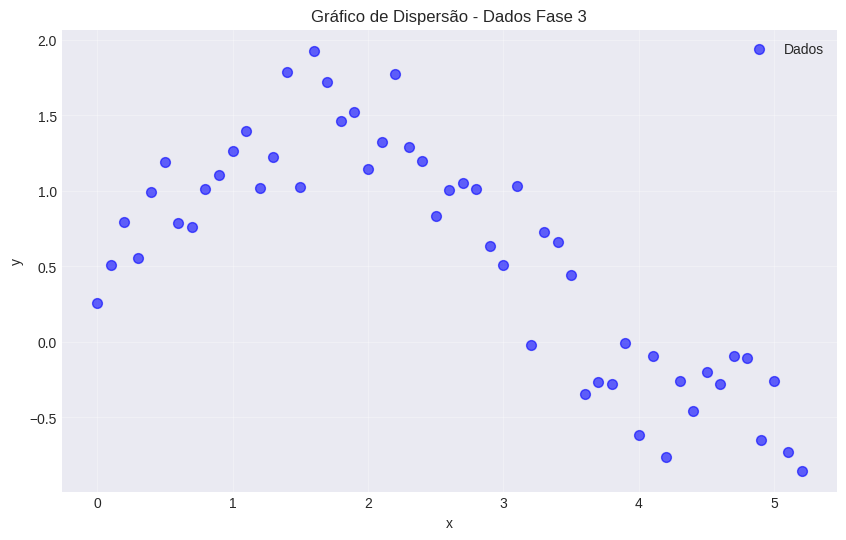

Gráfico de dispersão gerado com sucesso


In [186]:
#===== ITEM B: GRÁFICO DE DISPERSÃO DOS DADOS =====

print("Resposta item b):")

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados_fase3['x'], dados_fase3['y'], color='blue', alpha=0.6, s=50, label='Dados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de Dispersão - Dados Fase 3')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Gráfico de dispersão gerado com sucesso")

Resposta itens c), d), e) e f):

Regressão Polinomial N=1:
  y = 1.5179 - 0.3612x

Regressão Polinomial N=2:
  y = 0.7636 + 0.5261x - 0.1706x^2

Regressão Polinomial N=3:
  y = 0.1858 + 1.9267x - 0.8504x^2 + 0.0872x^3

Regressão Polinomial N=8:
  y = 0.2614 + 3.5104x - 8.7407x^2 + 11.9855x^3 - 8.5666x^4 + 3.3910x^5 - 0.7596x^6 + 0.0904x^7 - 0.0044x^8




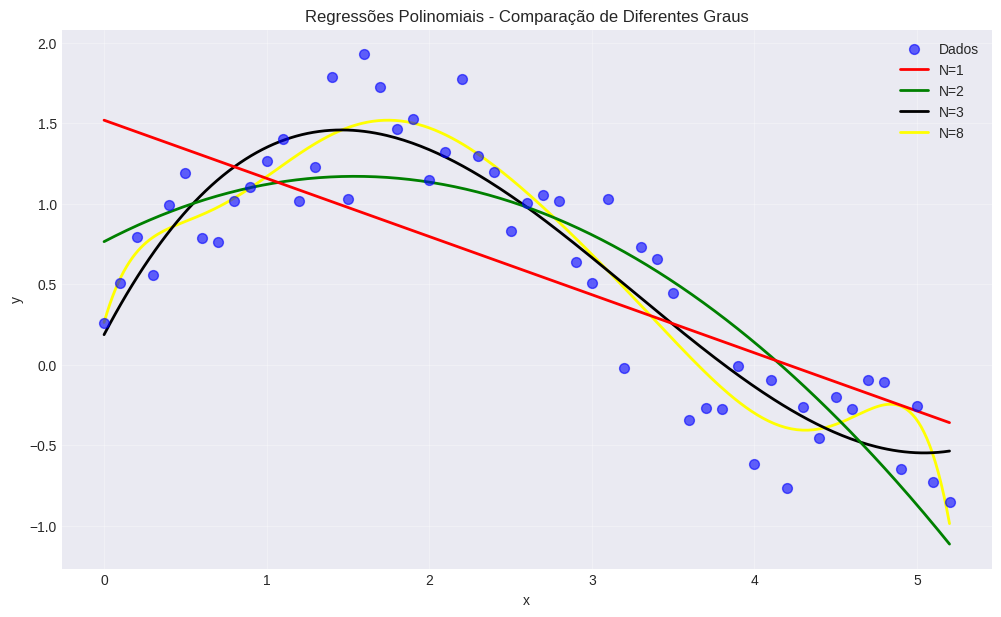


Gráfico com todas as regressões polinomiais gerado com sucesso


In [190]:
#===== ITENS C, D, E, F: REGRESSÕES POLINOMIAIS COM N=1, 2, 3, 8 =====

def printar_equacao_polinomial(coef, grau):
    """
    Imprime a equação polinomial no formato:
    y = β0 + β1x + β2x^2 + β3x^3 + ... + βNx^N

    Parâmetros:
    coef : array
        Coeficientes retornados por np.polyfit (ordem decrescente)
    grau : int
        Grau do polinômio
    """
    # Inverter coeficientes para ordem crescente [β0, β1, β2, ...]
    coef_invertido = coef[::-1]

    # Começar com β0
    equacao = f"y = {coef_invertido[0]:.4f}"

    # Adicionar termos de β1 até βN
    for i in range(1, grau + 1):
        # Determinar sinal
        sinal = '+' if coef_invertido[i] >= 0 else '-'

        # Montar termo
        if i == 1:
            termo = f" {sinal} {abs(coef_invertido[i]):.4f}x"
        else:
            termo = f" {sinal} {abs(coef_invertido[i]):.4f}x^{i}"

        equacao += termo

    return equacao

print("Resposta itens c), d), e) e f):")
print("="*60)

# Graus dos polinômios a serem testados
graus = [1, 2, 3, 8]
cores = ['red', 'green', 'black', 'yellow']
coeficientes = {}

# Calcular coeficientes para cada grau
for grau in graus:
    coef = np.polyfit(dados_fase3['x'], dados_fase3['y'], grau)
    coeficientes[grau] = coef
    print(f"\nRegressão Polinomial N={grau}:")
    print(f"  {printar_equacao_polinomial(coef, grau)}")
print("\n")

# Criar gráfico com todas as regressões
plt.figure(figsize=(12, 7))

# Plotar dados originais
plt.scatter(dados_fase3['x'], dados_fase3['y'], color='blue', alpha=0.6, s=50, label='Dados', zorder=5)

# Gerar pontos para as curvas de regressão
x_linha = np.linspace(dados_fase3['x'].min(), dados_fase3['x'].max(), 300)

# Plotar cada regressão polinomial
for i, grau in enumerate(graus):
    # Calcular valores preditos
    y_linha = np.polyval(coeficientes[grau], x_linha)

    # Plotar curva
    plt.plot(x_linha, y_linha, color=cores[i], linewidth=2, label=f'N={grau}', zorder=4-i)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressões Polinomiais - Comparação de Diferentes Graus')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nGráfico com todas as regressões polinomiais gerado com sucesso")

In [173]:
#===== ITEM G: CÁLCULO DO ERRO QUADRÁTICO MÉDIO (EQM) =====

print("Resposta item g):")
print("="*60)

# Calcular EQM para cada modelo
eqm_modelos = {}

for grau in graus:
    # Calcular valores preditos
    y_predito = np.polyval(coeficientes[grau], dados_fase3['x'])

    # Calcular resíduos
    residuos = dados_fase3['y'] - y_predito

    # Calcular EQM
    eqm = np.mean(residuos**2)
    eqm_modelos[grau] = eqm

    print(f"\nRegressão Polinomial N={grau}:")
    print(f"  Erro Quadrático Médio (EQM): {eqm:.4f}")

# Identificar modelo mais preciso
grau_menor_eqm = min(eqm_modelos, key=eqm_modelos.get)

print("\n" + "="*60)
print(f"Modelo mais preciso baseado no EQM: N={grau_menor_eqm} com EQM={eqm_modelos[grau_menor_eqm]:.4f}")
print("\nComparação dos EQMs:")
for grau in graus:
    print(f"  N={grau}: EQM={eqm_modelos[grau]:.6f}")

Resposta item g):

Regressão Polinomial N=1:
  Erro Quadrático Médio (EQM): 0.2659

Regressão Polinomial N=2:
  Erro Quadrático Médio (EQM): 0.1385

Regressão Polinomial N=3:
  Erro Quadrático Médio (EQM): 0.0787

Regressão Polinomial N=8:
  Erro Quadrático Médio (EQM): 0.0587

Modelo mais preciso baseado no EQM: N=8 com EQM=0.0587

Comparação dos EQMs:
  N=1: EQM=0.265934
  N=2: EQM=0.138526
  N=3: EQM=0.078697
  N=8: EQM=0.058709


## Divisão Treino/Teste

Para evitar overfitting, é essencial dividir os dados em conjuntos de treino e teste. O modelo é ajustado apenas com os dados de treino, e sua performance é avaliada com os dados de teste (dados que o modelo nunca viu durante o treinamento).

Esta abordagem permite identificar se o modelo está apenas memorizando os dados de treino (overfitting) ou se consegue generalizar para novos dados.

In [191]:
#===== DIVISÃO ALEATÓRIA: 10% TESTE, 90% TREINO =====

print("Divisão dos dados em treino e teste:")
print("="*60)

# Definir semente para reprodutibilidade
np.random.seed(42)

# Número total de amostras
n_total = len(dados_fase3)

# Número de amostras para teste (10%)
n_teste = int(0.1 * n_total)

# Número de amostras para treino (90%)
n_treino = n_total - n_teste

# Gerar índices aleatórios
indices = np.random.permutation(n_total)

# Separar índices de treino e teste
indices_teste = indices[:n_teste]
indices_treino = indices[n_teste:]

# Criar conjuntos de treino e teste
x_treino = dados_fase3['x'].iloc[indices_treino].values
y_treino = dados_fase3['y'].iloc[indices_treino].values

x_teste = dados_fase3['x'].iloc[indices_teste].values
y_teste = dados_fase3['y'].iloc[indices_teste].values

print(f"\nTotal de amostras: {n_total}")
print(f"Amostras de treino (90%): {n_treino}")
print(f"Amostras de teste (10%): {n_teste}")

print(f"\nConjunto de Treino:")
print(f"  x_treino: {x_treino.shape}")
print(f"  y_treino: {y_treino.shape}")
print(f"\nConjunto de Teste:")
print(f"  x_teste: {x_teste.shape}")
print(f"  y_teste: {y_teste.shape}")

print(f"\nDados de Treino:")
for i in range(len(x_treino)):
    print(f"  x={x_treino[i]:.4f}, y={y_treino[i]:.4f}")

print(f"\nDados de Teste:")
for i in range(len(x_teste)):
    print(f"  x={x_teste[i]:.4f}, y={y_teste[i]:.4f}")

Divisão dos dados em treino e teste:

Total de amostras: 53
Amostras de treino (90%): 48
Amostras de teste (10%): 5

Conjunto de Treino:
  x_treino: (48,)
  y_treino: (48,)

Conjunto de Teste:
  x_teste: (5,)
  y_teste: (5,)

Dados de Treino:
  x=0.5000, y=1.1906
  x=1.7000, y=1.7220
  x=5.0000, y=-0.2602
  x=0.3000, y=0.5577
  x=3.2000, y=-0.0206
  x=1.3000, y=1.2260
  x=0.8000, y=1.0140
  x=2.6000, y=1.0044
  x=0.6000, y=0.7864
  x=3.4000, y=0.6577
  x=0.4000, y=0.9923
  x=3.7000, y=-0.2680
  x=2.4000, y=1.1966
  x=4.4000, y=-0.4574
  x=3.3000, y=0.7274
  x=4.9000, y=-0.6483
  x=1.5000, y=1.0267
  x=0.9000, y=1.1021
  x=1.6000, y=1.9284
  x=3.0000, y=0.5086
  x=3.6000, y=-0.3438
  x=2.5000, y=0.8301
  x=1.1000, y=1.3991
  x=0.0000, y=0.2581
  x=4.6000, y=-0.2787
  x=2.7000, y=1.0514
  x=3.1000, y=1.0296
  x=3.9000, y=-0.0080
  x=2.9000, y=0.6348
  x=4.5000, y=-0.1985
  x=0.1000, y=0.5085
  x=2.1000, y=1.3221
  x=0.2000, y=0.7936
  x=4.0000, y=-0.6202
  x=3.5000, y=0.4454
  x=2.3000, 

Resposta itens e) e f):

Ajuste das regressões polinomiais usando APENAS dados de treino:

Regressão Polinomial N=1:
  y = 1.4929 - 0.3542x

Regressão Polinomial N=2:
  y = 0.7604 + 0.5275x - 0.1716x^2

Regressão Polinomial N=3:
  y = 0.1763 + 1.9895x - 0.8823x^2 + 0.0908x^3

Regressão Polinomial N=8:
  y = 0.2710 + 3.3617x - 8.4968x^2 + 12.1872x^3 - 9.0810x^4 + 3.7233x^5 - 0.8579x^6 + 0.1043x^7 - 0.0052x^8


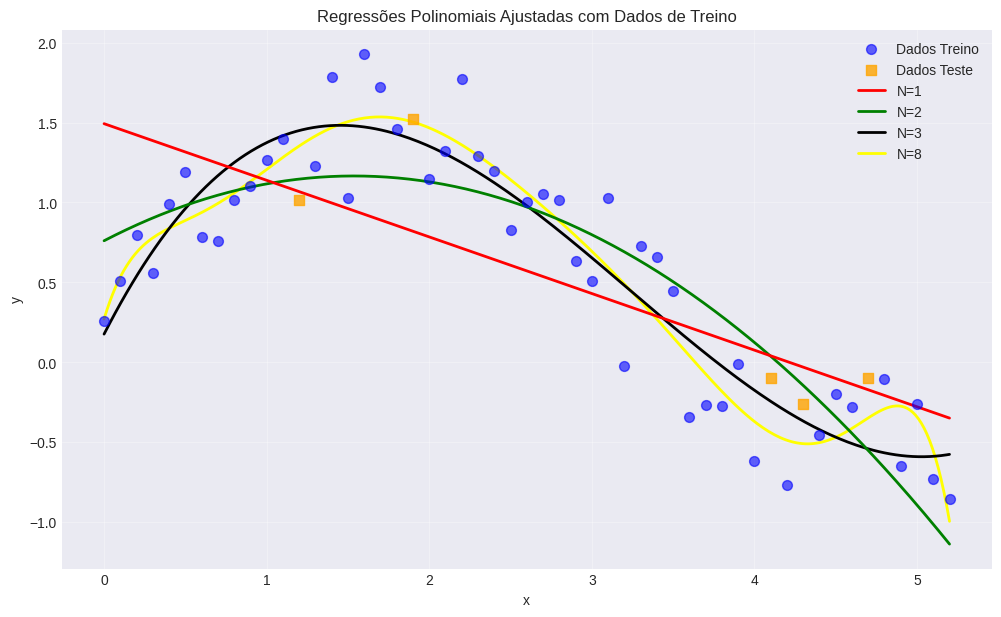


Gráfico com regressões ajustadas nos dados de treino gerado com sucesso


In [192]:
#===== ITENS E, F: AJUSTAR REGRESSÕES (N=1,2,3,8) APENAS COM DADOS DE TREINO =====

print("Resposta itens e) e f):")
print("="*60)
print("\nAjuste das regressões polinomiais usando APENAS dados de treino:")

# Graus dos polinômios a serem testados
graus_treino = [1, 2, 3, 8]
cores_treino = ['red', 'green', 'black', 'yellow']
coeficientes_treino = {}

# Calcular coeficientes para cada grau usando apenas dados de treino
for grau in graus_treino:
    coef = np.polyfit(x_treino, y_treino, grau)
    coeficientes_treino[grau] = coef
    print(f"\nRegressão Polinomial N={grau}:")
    print(f"  {printar_equacao_polinomial(coef, grau)}")

# Criar gráfico com todas as regressões ajustadas com dados de treino
plt.figure(figsize=(12, 7))

# Plotar dados de treino
plt.scatter(x_treino, y_treino, color='blue', alpha=0.6, s=50, label='Dados Treino', zorder=5)

# Plotar dados de teste
plt.scatter(x_teste, y_teste, color='orange', alpha=0.8, s=60, marker='s', label='Dados Teste', zorder=6)

# Gerar pontos para as curvas de regressão
x_linha = np.linspace(dados_fase3['x'].min(), dados_fase3['x'].max(), 300)

# Plotar cada regressão polinomial
for i, grau in enumerate(graus_treino):
    # Calcular valores preditos
    y_linha = np.polyval(coeficientes_treino[grau], x_linha)

    # Plotar curva
    plt.plot(x_linha, y_linha, color=cores_treino[i], linewidth=2, label=f'N={grau}', zorder=4-i)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressões Polinomiais Ajustadas com Dados de Treino')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nGráfico com regressões ajustadas nos dados de treino gerado com sucesso")

In [194]:
#===== ITEM G: CALCULAR ERRO APENAS COM DADOS DE TESTE =====

print("Resposta item g):")
print("="*60)
print("\nCálculo do EQM usando dados de TESTE:")
print("(Avalia a capacidade de generalização dos modelos)")

# Calcular EQM para cada modelo usando dados de teste
eqm_teste = {}

for grau in graus_treino:
    # Calcular valores preditos para dados de teste usando coeficientes do treino
    y_predito_teste = np.polyval(coeficientes_treino[grau], x_teste)

    # Calcular resíduos
    residuos_teste = y_teste - y_predito_teste

    # Calcular EQM
    eqm = np.mean(residuos_teste**2)
    eqm_teste[grau] = eqm

    print(f"\nRegressão Polinomial N={grau}:")
    print(f"  Erro Quadrático Médio (EQM) no Teste: {eqm:.4f}")

# Identificar modelo com melhor performance no teste
grau_menor_eqm_teste = min(eqm_teste, key=eqm_teste.get)

print("\n" + "="*60)
print("Análise de Generalização:")
print(f"Modelo com menor erro em dados novos: N={grau_menor_eqm_teste} com EQM={eqm_teste[grau_menor_eqm_teste]:.4f}")
print("\nRanking dos modelos (do melhor ao pior):")
print("(Menor EQM = melhor capacidade de generalização)")

eqm_ordenado = sorted(eqm_teste.items(), key=lambda x: x[1])
for posicao, (grau, eqm) in enumerate(eqm_ordenado, 1):
    if grau == grau_menor_eqm_teste:
        print(f"  {posicao}º lugar - N={grau}: EQM={eqm:.6f} <-- Melhor generalização estimada")
    else:
        print(f"  {posicao}º lugar - N={grau}: EQM={eqm:.6f}")

Resposta item g):

Cálculo do EQM usando dados de TESTE:
(Avalia a capacidade de generalização dos modelos)

Regressão Polinomial N=1:
  Erro Quadrático Médio (EQM) no Teste: 0.1156

Regressão Polinomial N=2:
  Erro Quadrático Médio (EQM) no Teste: 0.0804

Regressão Polinomial N=3:
  Erro Quadrático Médio (EQM) no Teste: 0.0871

Regressão Polinomial N=8:
  Erro Quadrático Médio (EQM) no Teste: 0.0711

Análise de Generalização:
Modelo com menor erro em dados novos: N=8 com EQM=0.0711

Ranking dos modelos (do melhor ao pior):
(Menor EQM = melhor capacidade de generalização)
  1º lugar - N=8: EQM=0.071083 <-- Melhor generalização estimada
  2º lugar - N=2: EQM=0.080359
  3º lugar - N=3: EQM=0.087070
  4º lugar - N=1: EQM=0.115602


## Coeficiente de Determinação (R²)

O coeficiente de determinação $R^2$ é uma métrica que avalia a qualidade do ajuste do modelo, indicando quanto da variabilidade dos dados é explicada pelo modelo de regressão.

A equação do $R^2$ é dada por:

$$R^2 = 1 - \frac{SQR}{SQT}$$

Onde:
- $SQR$ é a soma dos quadrados dos resíduos: $SQR = \sum(y_i - \hat{y}_i)^2$
- $SQT$ é a soma total dos quadrados: $SQT = \sum(y_i - \bar{y})^2$

Interpretação do $R^2$:
- $R^2 = 1$ indica ajuste perfeito (o modelo explica 100% da variabilidade dos dados)
- $R^2 = 0$ indica que o modelo não explica nada da variabilidade dos dados
- $0 < R^2 < 1$ indica ajuste parcial (quanto mais próximo de 1, melhor)
- $R^2 < 0$ pode ocorrer no conjunto de teste, indicando que o modelo performa pior que simplesmente usar a média

Para identificar overfitting, comparamos:
- $R^2$ alto no treino e baixo no teste: indica overfitting (modelo memorizou dados de treino)
- $R^2$ similar no treino e teste: indica boa generalização

In [195]:
#===== ITEM K: CÁLCULO DO R² (COEFICIENTE DE DETERMINAÇÃO) =====

def calcular_r2(y_real, y_predito):
    """
    Calcula o coeficiente de determinação R².

    Parâmetros:
    y_real : array
        Valores reais
    y_predito : array
        Valores preditos pelo modelo

    Retorna:
    r2 : float
        Coeficiente de determinação
    """
    # Calcular média dos valores reais
    y_media = np.mean(y_real)

    # Calcular SQR (soma dos quadrados dos resíduos)
    sqr = np.sum((y_real - y_predito)**2)

    # Calcular SQT (soma total dos quadrados)
    sqt = np.sum((y_real - y_media)**2)

    # Calcular R²
    r2 = 1 - (sqr / sqt)

    return r2

print("Resposta item k):")
print("="*60)
print("\nCálculo do R² para TREINO e TESTE:")

# Armazenar resultados
r2_treino = {}
r2_teste = {}

for grau in graus_treino:
    # Calcular predições para treino
    y_predito_treino = np.polyval(coeficientes_treino[grau], x_treino)

    # Calcular predições para teste
    y_predito_teste = np.polyval(coeficientes_treino[grau], x_teste)

    # Calcular R² para treino
    r2_treino[grau] = calcular_r2(y_treino, y_predito_treino)

    # Calcular R² para teste
    r2_teste[grau] = calcular_r2(y_teste, y_predito_teste)

    print(f"\nRegressão Polinomial N={grau}:")
    print(f"  R² Treino: {r2_treino[grau]:.4f}")
    print(f"  R² Teste:  {r2_teste[grau]:.4f}")
    print(f"  Diferença: {abs(r2_treino[grau] - r2_teste[grau]):.4f}")

    # Análise de overfitting
    if r2_treino[grau] > 0.95 and r2_teste[grau] < 0.5:
        print(f"  Análise: FORTE EVIDÊNCIA DE OVERFITTING")
    elif r2_treino[grau] - r2_teste[grau] > 0.3:
        print(f"  Análise: Possível overfitting")
    elif abs(r2_treino[grau] - r2_teste[grau]) < 0.1:
        print(f"  Análise: Boa generalização")
    else:
        print(f"  Análise: Generalização moderada")

print("\n" + "="*60)
print("Resumo da Análise:")
print("Quanto maior a diferença entre R² treino e R² teste, maior a evidência de overfitting.")

Resposta item k):

Cálculo do R² para TREINO e TESTE:

Regressão Polinomial N=1:
  R² Treino: 0.5092
  R² Teste:  0.7757
  Diferença: 0.2665
  Análise: Generalização moderada

Regressão Polinomial N=2:
  R² Treino: 0.7479
  R² Teste:  0.8441
  Diferença: 0.0962
  Análise: Boa generalização

Regressão Polinomial N=3:
  R² Treino: 0.8630
  R² Teste:  0.8311
  Diferença: 0.0319
  Análise: Boa generalização

Regressão Polinomial N=8:
  R² Treino: 0.8969
  R² Teste:  0.8621
  Diferença: 0.0348
  Análise: Boa generalização

Resumo da Análise:
Quanto maior a diferença entre R² treino e R² teste, maior a evidência de overfitting.


## Análise Final: Escolha do Melhor Modelo

Com base nos resultados obtidos, devemos identificar qual modelo apresenta o melhor desempenho considerando tanto o ajuste aos dados quanto a capacidade de generalização.

Critérios de avaliação:
- Modelo com menor EQM no conjunto de teste indica melhor capacidade de predição em dados novos
- Diferença pequena entre $R^2$ de treino e teste indica ausência de overfitting
- Modelos com grau muito alto tendem a memorizar ruídos dos dados de treino (overfitting)
- Modelos com grau muito baixo podem não capturar padrões importantes (underfitting)

O modelo ideal apresenta equilíbrio entre complexidade e generalização.

In [202]:
#===== AVALIAÇÃO DOS MODELOS COM MÚLTIPLAS ITERAÇÕES =====

print("AVALIAÇÃO DOS MODELOS COM MÚLTIPLAS ITERAÇÕES")
print("="*60)

# Configurações
n_iteracoes = 10000
proporcao_teste = 0.1

# Calcular proporção de treino
proporcao_treino = 1 - proporcao_teste

# Armazenar resultados de todas as iterações
resultados_eqm_teste = {grau: [] for grau in graus_treino}
resultados_r2_treino = {grau: [] for grau in graus_treino}
resultados_r2_teste = {grau: [] for grau in graus_treino}

print(f"\nExecutando {n_iteracoes} iterações com divisões aleatórias diferentes...")
print(f"Cada iteração: {proporcao_treino*100:.0f}% treino, {proporcao_teste*100:.0f}% teste")
print("Aguarde...\n")

# Executar múltiplas iterações
for iteracao in range(n_iteracoes):
    # Definir seed diferente para cada iteração
    np.random.seed(iteracao + 1000)

    # Número total de amostras
    n_total = len(dados_fase3)

    # Número de amostras para teste
    n_teste = int(proporcao_teste * n_total)

    # Gerar índices aleatórios
    indices = np.random.permutation(n_total)

    # Separar índices de treino e teste
    indices_teste_iter = indices[:n_teste]
    indices_treino_iter = indices[n_teste:]

    # Criar conjuntos de treino e teste desta iteração
    x_treino_iter = dados_fase3['x'].iloc[indices_treino_iter].values
    y_treino_iter = dados_fase3['y'].iloc[indices_treino_iter].values
    x_teste_iter = dados_fase3['x'].iloc[indices_teste_iter].values
    y_teste_iter = dados_fase3['y'].iloc[indices_teste_iter].values

    # Para cada grau de polinômio
    for grau in graus_treino:
        # Treinar modelo com dados de treino desta iteração
        coef_iter = np.polyfit(x_treino_iter, y_treino_iter, grau)

        # Calcular predições
        y_pred_treino_iter = np.polyval(coef_iter, x_treino_iter)
        y_pred_teste_iter = np.polyval(coef_iter, x_teste_iter)

        # Calcular EQM no teste
        eqm_teste_iter = np.mean((y_teste_iter - y_pred_teste_iter)**2)

        # Calcular R² no treino e teste
        r2_treino_iter = calcular_r2(y_treino_iter, y_pred_treino_iter)
        r2_teste_iter = calcular_r2(y_teste_iter, y_pred_teste_iter)

        # Armazenar resultados
        resultados_eqm_teste[grau].append(eqm_teste_iter)
        resultados_r2_treino[grau].append(r2_treino_iter)
        resultados_r2_teste[grau].append(r2_teste_iter)

print("Iterações concluídas!\n")

# Calcular estatísticas agregadas
print("="*60)
print(f"RESULTADOS OBTIDOS ({n_iteracoes} ITERAÇÕES)")
print("="*60)

print(f"\n{'Modelo':<10} {'EQM Teste':<25} {'R² Treino':<25} {'R² Teste':<25}")
print(f"{'':10} {'Média ± Desvio':<25} {'Média ± Desvio':<25} {'Média ± Desvio':<25}")
print("-" * 85)

for grau in graus_treino:
    # Calcular médias
    eqm_media = np.mean(resultados_eqm_teste[grau])
    eqm_desvio = np.std(resultados_eqm_teste[grau])

    r2_treino_media = np.mean(resultados_r2_treino[grau])
    r2_treino_desvio = np.std(resultados_r2_treino[grau])

    r2_teste_media = np.mean(resultados_r2_teste[grau])
    r2_teste_desvio = np.std(resultados_r2_teste[grau])

    print(f"N={grau:<8} {eqm_media:.4f} ± {eqm_desvio:.4f}      {r2_treino_media:.4f} ± {r2_treino_desvio:.4f}      {r2_teste_media:.4f} ± {r2_teste_desvio:.4f}")

# Identificar melhor modelo baseado na média do EQM de teste
melhor_modelo_robusto = min(graus_treino, key=lambda g: np.mean(resultados_eqm_teste[g]))

print("\n" + "="*60)
print("ANÁLISE E CONCLUSÕES")
print("="*60)

print(f"\n1. Melhor modelo (baseado em {n_iteracoes} iterações): N={melhor_modelo_robusto}")
print(f"   - Menor EQM médio no teste: {np.mean(resultados_eqm_teste[melhor_modelo_robusto]):.6f} ± {np.std(resultados_eqm_teste[melhor_modelo_robusto]):.6f}")
print(f"   - R² médio no teste: {np.mean(resultados_r2_teste[melhor_modelo_robusto]):.4f} ± {np.std(resultados_r2_teste[melhor_modelo_robusto]):.4f}")

print(f"\n2. Evidências de overfitting:")
for grau in graus_treino:
    diferenca_r2_media = np.mean(resultados_r2_treino[grau]) - np.mean(resultados_r2_teste[grau])
    if diferenca_r2_media > 0.3:
        print(f"   - N={grau}: Diferença R² treino-teste = {diferenca_r2_media:.4f} → OVERFITTING CONFIRMADO")
    elif diferenca_r2_media > 0.15:
        print(f"   - N={grau}: Diferença R² treino-teste = {diferenca_r2_media:.4f} → Possível overfitting")

print(f"\n3. Estabilidade dos modelos (baseado no desvio padrão do EQM):")
for grau in graus_treino:
    desvio = np.std(resultados_eqm_teste[grau])
    if desvio < 2.0:
        print(f"   - N={grau}: Desvio padrão = {desvio:.4f} → Modelo estável")
    else:
        print(f"   - N={grau}: Desvio padrão = {desvio:.4f} → Modelo instável")

print(f"\n4. Conclusão final:")
print(f"   Após {n_iteracoes} iterações com divisões aleatórias diferentes,")
print(f"   o modelo N={melhor_modelo_robusto} demonstrou:")
print(f"   - Melhor capacidade de generalização (menor EQM médio em dados novos)")
print(f"   - Resultados consistentes (baixo desvio padrão)")
print(f"   - Equilíbrio entre ajuste e complexidade")

AVALIAÇÃO DOS MODELOS COM MÚLTIPLAS ITERAÇÕES

Executando 10000 iterações com divisões aleatórias diferentes...
Cada iteração: 90% treino, 10% teste
Aguarde...

Iterações concluídas!

RESULTADOS OBTIDOS (10000 ITERAÇÕES)

Modelo     EQM Teste                 R² Treino                 R² Teste                 
           Média ± Desvio            Média ± Desvio            Média ± Desvio           
-------------------------------------------------------------------------------------
N=1        0.2910 ± 0.1554      0.5346 ± 0.0294      -0.0007 ± 1.5681
N=2        0.1573 ± 0.0863      0.7583 ± 0.0134      0.5512 ± 0.6522
N=3        0.0923 ± 0.0411      0.8628 ± 0.0075      0.6864 ± 0.6717
N=8        0.0887 ± 0.0811      0.8986 ± 0.0065      0.6929 ± 0.8374

ANÁLISE E CONCLUSÕES

1. Melhor modelo (baseado em 10000 iterações): N=8
   - Menor EQM médio no teste: 0.088663 ± 0.081121
   - R² médio no teste: 0.6929 ± 0.8374

2. Evidências de overfitting:
   - N=1: Diferença R² treino-teste = 0.5

## Referências Bibliográficas

COHEN, J. et al. **Applied multiple regression/correlation analysis for the behavioral sciences**. 3. ed. Mahwah: Lawrence Erlbaum Associates, 2003.

DRAPER, N. R.; SMITH, H. **Applied regression analysis**. 3. ed. New York: John Wiley & Sons, 1998. 709 p.

NETER, J. et al. **Applied linear statistical models**. 4. ed. Boston: McGraw-Hill, 1996. 1408 p.

RUSSELL, S. J.; NORVIG, P. **Inteligência artificial**: uma abordagem moderna. 4. ed. Rio de Janeiro: GEN LTC, 2022. Disponível em: https://integrada.minhabiblioteca.com.br/books/9788595159495. Acesso em: 07 out. 2025.